<a href="https://colab.research.google.com/github/Uday-S-D/EDA_Capstone-1-Global_Terrorism_data/blob/main/EDA_Capstone_1_Global_Terrorism_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

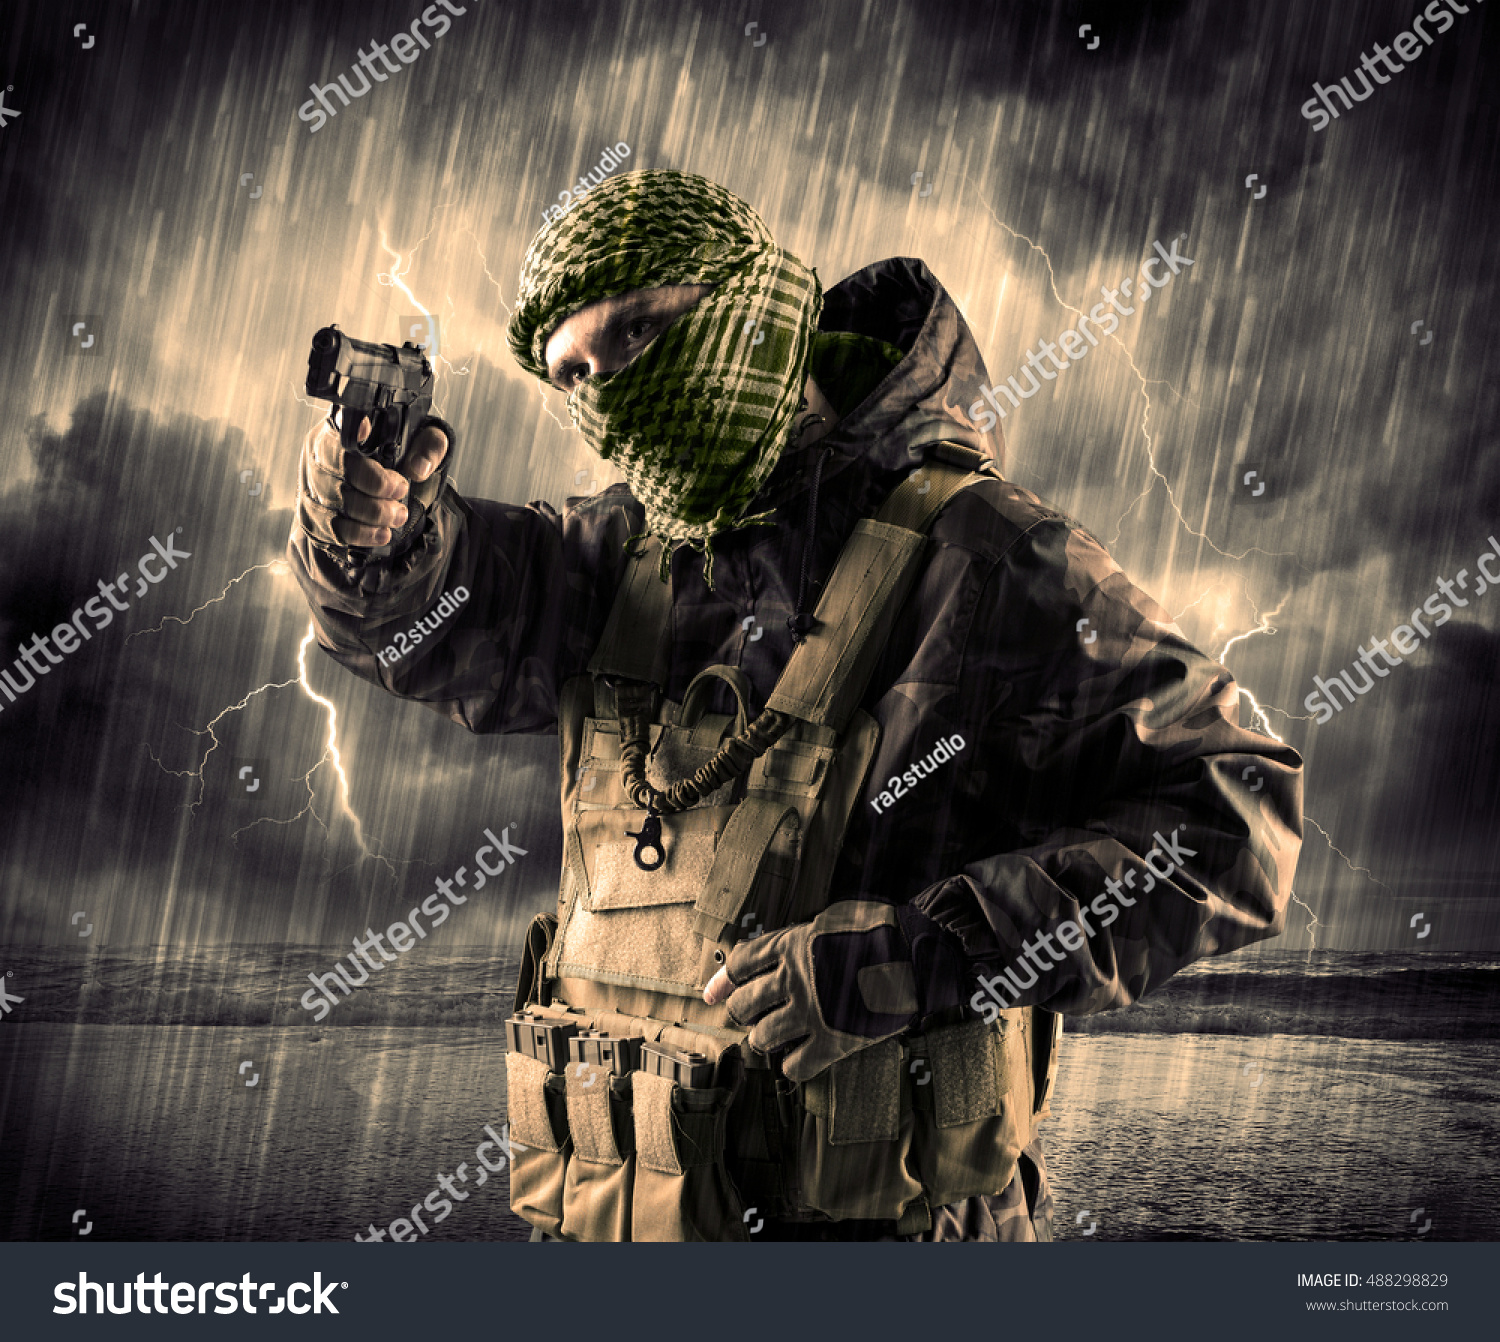

**INTRODUCTION**

* *This document reflects the collection and coding rules for the Global Terrorism DatabaseTM*. 
* *The GTD is
an event-level database containing more than 200,000 records of terrorist attacks that took place 
around the world since 1970*. 
* *It is maintained by the National Consortium for the Study of Terrorism 
and Responses to Terrorism (START) at the University of Maryland*. 
* *This codebook describes the GTD’s 
methodology, inclusion criteria, and variables*. 
* *The GTD research team updates the codebook 
periodically; key changes are documented below*

**Current Data Collection Methodology (2012-present)**
* *In order to maximize the efficiency, accuracy, and completeness of GTD collection, the GTD team at 
START combines automated and manual data collection strategies.*
* *The process begins with a universe 
of over one million media articles on any topic published daily worldwide in order to identify the 
relatively small subset of articles that describe terrorist attacks.*
* *This is accomplished by applying 
customized keyword filters to the “fire hose” of media articles available through a subscription to the 
Metabase Application Programming Interface (API) provided by Lexis Nexis. The English-language 
content from Metabase is supplemented with articles accessed via API from BBC Monitoring, which 
includes English-language translations of sources from around 150 countries in over 100 languages.*

(Note: In the past the process included translated content from Open Source Enterprise). 
* *This filter 
isolates an initial pool of potentially relevant articles, approximately 400,000 per month. These articles 
are then processed using more sophisticated natural language processing (NLP) and machine learning 
techniques to further refine the results, remove duplicate articles, and identify articles that are likely to 
be relevant.*
* *The GTD team manually reviews this second subset of articles to identify the unique 
events that satisfy the GTD inclusion criteria and are subsequently researched and coded according to 
the specifications of the GTD Codebook. Each month, GTD researchers at START review approximately 
8,000 - 16,000 articles and identify attacks to be added to the GTD.*

**Import the required Libraries to be used in the analysis.**



In [87]:
# Basic Dependencies
import pandas as pd
import numpy as np
# For basic Ploting graph and charts
import matplotlib.pyplot as plt
%matplotlib inline
# Using Plotly instance methods to plot your data on interactive maps and charts
import plotly.express as px
import plotly.graph_objects as go
# Convert Country name to ISO-3611 Alpha-3 codes for georaphical map plotting
# Install_CODE: !pip install dataprep

# For more plotting options
import seaborn as sns
# To just ignore all the warnings.
import warnings
warnings.filterwarnings("ignore")

***Import the Data On which EDA needs to be performed to draw Insights and make better and efficient and useful decisions.we have used Pd.read_csv() function to read the data from the file.***


In [10]:
df = pd.read_csv("/content/drive/MyDrive/DATA/Global Terrorism Data.csv",encoding_errors='replace')


***Now we have loaded the Data, let's check number of Rows and Columns in the data using Shape() Function.***

In [11]:
df.shape

(181691, 135)

***To know the data varaiables we'll use .head() so that we'll get first five rows of the DataFrame()***

In [12]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


***.info() gives the descriptive information of the Data along with its Data type of the respective columns Verbose= TRUE is given so that the output of each is displayed***

In [13]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 135 columns):
 #    Column              Dtype  
---   ------              -----  
 0    eventid             int64  
 1    iyear               int64  
 2    imonth              int64  
 3    iday                int64  
 4    approxdate          object 
 5    extended            int64  
 6    resolution          object 
 7    country             int64  
 8    country_txt         object 
 9    region              int64  
 10   region_txt          object 
 11   provstate           object 
 12   city                object 
 13   latitude            float64
 14   longitude           float64
 15   specificity         float64
 16   vicinity            int64  
 17   location            object 
 18   summary             object 
 19   crit1               int64  
 20   crit2               int64  
 21   crit3               int64  
 22   doubtterr           float64
 23   alternative         float64
 24 

***Lets use df.columns to get the insights into Lables of the data set.***

In [14]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

***According to Global Terrorism Data(GTD) Code book there are information regarding the codeword used in the dataset such a given below:***


*  *extended = Incident_Duration*
*  *alternative_txt = Attack_Tactic*
*  *attacktype1_txt = Attack_type*
*  *targtype1_txt = Target_type*
*   *targsubtype1_txt = Target_SubCat*
*   *gname = Terror_Group*
*   *motive = Terror_Motive*
*   *weaptype1_txt = Weapon_Type*
*   *weapsubtype1_txt = Weapon_Subtype*
*   *nkill = Total_Killed*
*   *nwoundus = Total_Wounded*
*   *nkillter = Terrorists_Killed*
*   *propextent_txt = Prorperty_Damage*
*   *ishostkid = Hostage_con*
*   *ransomamt = Ransom_amt*
*   *ransompaid = Ransom_amt_paid*
*   *hostkidoutcome_txt = Hostage_outcome*
 
 
***Hence Rename them for better understanding of the dataset.***













In [15]:
#Rename Using Rename key of Pandas DataFrame
df.rename(columns={'iyear':'Year','extended':'Incident_Duration','city':'City','country':'Country_code','country_txt':'Country','region_txt':'Region','summary':'Summary', 'success':'Success',
                        'alternative_txt':'Attack_Tactic','attacktype1_txt':'Attack_type','suicide':'Suicide','targtype1_txt':'Target_type','targsubtype1_txt':'Target_SubCat',
                         'gname':'Terror_Group','motive':'Terror_Motive','weaptype1_txt':'Weapon_Type','weapsubtype1_txt':'Weapon_Subtype','nkill':'Total_Killed',
                        'nwoundus':'Total_Wounded','nkillter':'Terrorists_Killed','propextent_txt':'Prorperty_Damage','ishostkid':'Hostage_con',
                        'ransom':'Ransom','ransomamt':'Ransom_amt','ransompaid':'Ransom_amt_paid','hostkidoutcome_txt':'Hostage_outcome'}, inplace=True)

In [16]:
df

,eventid,Year,imonth,iday,approxdate,Incident_Duration,resolution,Country_code,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [89]:
# Now creating a new dataframe veriable to keep the desired columns 
Data = df[['Year', 'Incident_Duration', 'City', 'Country', 'Region', 'Summary', 'Success','Attack_Tactic','Attack_type',
                            'Suicide','Target_type','Target_SubCat','Terror_Group','Terror_Motive','Weapon_Type','Weapon_Subtype','Total_Killed','Total_Wounded',
                            'Terrorists_Killed','Prorperty_Damage','Hostage_con','Ransom','Ransom_amt','Ransom_amt_paid','Hostage_outcome']].reset_index(drop=True)

In [90]:
Data

,Year,Incident_Duration,City,Country,Region,Summary,Success,Attack_Tactic,Attack_type,Suicide,...,Weapon_Subtype,Total_Killed,Total_Wounded,Terrorists_Killed,Prorperty_Damage,Hostage_con,Ransom,Ransom_amt,Ransom_amt_paid,Hostage_outcome
0,1970,0,Santo Domingo,Dominican Republic,Central America & Caribbean,NaN,1,NaN,Assassination,0,...,NaN,1.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
1,1970,0,Mexico city,Mexico,North America,NaN,1,NaN,Hostage Taking (Kidnapping),0,...,NaN,0.0,NaN,NaN,NaN,1.0,1.0,800000.0,NaN,NaN
2,1970,0,Unknown,Philippines,Southeast Asia,NaN,1,NaN,Assassination,0,...,NaN,1.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
3,1970,0,Athens,Greece,Western Europe,NaN,1,NaN,Bombing/Explosion,0,...,Unknown Explosive Type,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
4,1970,0,Fukouka,Japan,East Asia,NaN,1,NaN,Facility/Infrastructure Attack,0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,0,Ceelka Geelow,Somalia,Sub-Saharan Africa,12/31/2017: Assailants opened fire on a Somali...,1,Insurgency/Guerilla Action,Armed Assault,0,...,Unknown Gun Type,1.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN
181687,2017,0,Jableh,Syria,Middle East & North Africa,12/31/2017: Assailants launched mortars at the...,1,Insurgency/Guerilla Action,Bombing/Explosion,0,...,"Projectile (rockets, mortars, RPGs, etc.)",2.0,0.0,0.0,Unknown,0.0,NaN,NaN,NaN,NaN
181688,2017,0,Kubentog,Philippines,Southeast Asia,12/31/2017: Assailants set fire to houses in K...,1,NaN,Facility/Infrastructure Attack,0,...,Arson/Fire,0.0,0.0,0.0,Unknown,0.0,NaN,NaN,NaN,NaN
181689,2017,0,Imphal,India,South Asia,12/31/2017: Assailants threw a grenade at a Fo...,0,NaN,Bombing/Explosion,0,...,Grenade,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN


In [92]:
# City Column
Data['City'].fillna('Unknown', inplace = True)

# Summery Column 
Data['Summary'].fillna('Unknown', inplace = True)

# Terror_Motive column
Data['Terror_Motive'].fillna('Unknown', inplace = True)

# Prorperty_Damage column
Data['Prorperty_Damage'].fillna('Unknown', inplace = True)

# Attack_Tactic column
Data['Attack_Tactic'].fillna('Unknown', inplace = True)

# Target_SubCat column
Data['Target_SubCat'].fillna('Unknown', inplace = True)

# Weapon_Subtype column
Data['Weapon_Subtype'].fillna('Unknown', inplace = True)

# Filling null values in Hostage_outcome column
Data['Hostage_outcome'].fillna('Unknown', inplace = True)

# Summery column
Data['Summary'].fillna('Undocumented', inplace = True)

# Filling null values in Ransom_amt_paid column
Data['Ransom_amt_paid'].fillna(0, inplace = True)

# Filling null values in Ransom_amt column
Data['Ransom_amt'].fillna(0, inplace = True)

# Filling null values in Ransom_amt column
Data['Ransom'].fillna(-9.0, inplace = True)

# Replacing floating values with for better meaningful categorial value
Data[['Hostage_con','Ransom']] = Data[['Hostage_con','Ransom']].replace({0.0:'NO', 1.0:'Yes', -9.0:'Unknown'})

*Now, The columns 'Total_Killed', 'Total_Wounded' and 'Terrorists_Killed' also have 10313, 64702 and 66958 NaN values respectively which is alot to ignore and would change the course analysis. Thus, to control that we will replace the NaN values with Mode of the resepective column.*

In [93]:
# Total_Killed Column
Data['Total_Killed'] = Data['Total_Killed'].fillna(Data['Total_Killed'].mode()[0])
# Total_Wounded Column
Data['Total_Wounded'] = Data['Total_Wounded'].fillna(Data['Total_Wounded'].mode()[0])
# Terrorists_Killed Column
Data['Terrorists_Killed'] = Data['Terrorists_Killed'].fillna(Data['Terrorists_Killed'].mode()[0])

# Creating a new Column to show total_Casualities which is just a total number of people who got wounded and 
# killed in that incident including all Attackers, Defenders and Civilians

Data['Total_Casualities'] = Data['Total_Killed'] + Data['Total_Wounded']

In [94]:
# # Re-Mapping the actual meaning of the row value in 'Incident_Duration' column as per the DATABASE VERIABLE GUIDE
Data['Incident_Duration'] = Data['Incident_Duration'].replace({0:'More than 24 hours', 1:'Less than 24 hours'})


# Changing Weapon type 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs' with 'Vehicle' for better meaning
Data['Weapon_Type'] = Data['Weapon_Type'].replace({'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)':'Vehicle'})


# Now changing the data type of above columns from float64 to int as deaths/wounded personal count can`t be in decimals for obvious reasons
Data = Data.astype({'Total_Killed':'int','Total_Wounded':'int','Terrorists_Killed':'int','Total_Casualities':'int'})


# Chnaging Attack type 'Hostage Taking (Kidnapping)' with 'Kidnapping' AND 
# 'Hostage Taking (Barricade Incident)' with 'Barricade Incident' for better meaning
Data['Attack_type'] = Data['Attack_type'].replace({'Hostage Taking (Kidnapping)':'Kidnapping','Hostage Taking (Barricade Incident)':'Barricade Incident'})


# Re-Mapping the Property_damaged Terms with meaningful ones
Data['Prorperty_Damage'] = Data['Prorperty_Damage'].replace({'Minor (likely < $1 million)':'Minor: Likely Less than $1 Million',
                                                                                     'Major (likely >= $1 million but < $1 billion)':'Major: Between $1 Million - $1 Billion',
                                                                                     'Catastrophic (likely >= $1 billion)':'Catastrophic: Likely more than $1 Billion'})

In [22]:
Data['Year'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017])

In [23]:
Data['Country'].unique()

array(['Dominican Republic', 'Mexico', 'Philippines', 'Greece', 'Japan',
       'United States', 'Uruguay', 'Italy', 'East Germany (GDR)',
       'Ethiopia', 'Guatemala', 'Venezuela', 'West Germany (FRG)',
       'Switzerland', 'Jordan', 'Spain', 'Brazil', 'Egypt', 'Argentina',
       'Lebanon', 'Ireland', 'Turkey', 'Paraguay', 'Iran',
       'United Kingdom', 'Colombia', 'Bolivia', 'Nicaragua',
       'Netherlands', 'Belgium', 'Canada', 'Australia', 'Pakistan',
       'Zambia', 'Sweden', 'Costa Rica', 'South Yemen', 'Cambodia',
       'Israel', 'Poland', 'Taiwan', 'Panama', 'Kuwait',
       'West Bank and Gaza Strip', 'Austria', 'Czechoslovakia', 'India',
       'France', 'South Vietnam', 'Brunei', 'Zaire',
       "People's Republic of the Congo", 'Portugal', 'Algeria',
       'El Salvador', 'Thailand', 'Haiti', 'Sudan', 'Morocco', 'Cyprus',
       'Myanmar', 'Afghanistan', 'Peru', 'Chile', 'Honduras',
       'Yugoslavia', 'Ecuador', 'New Zealand', 'Malaysia', 'Singapore',
       'Bot

In [95]:
# Changing data type from Float64 to integer
Data = Data.astype({'Ransom_amt':'int','Ransom_amt_paid':'int'})

# Replacing floating values with for better meaningful categorial value
Data[['Ransom_amt','Ransom_amt_paid']] = Data[['Ransom_amt','Ransom_amt_paid']].replace({-99:'Unknown'})

*Now we will drop above NaN values aka Non-Existent Countries from Country_code column as those countries doesn`t exist anymore either because they have been split into multiple countries (Ex.Yugoslavia no longer exists. The nation that was Yugoslavia has now been split into several smaller nations, one of which is Macedonia) or got re-named through out the time*.

*Those counties contribute 0.44% of the data thus removing them wont affect the stats of other countries*.

In [125]:
# Dropping NaN value throughout the dataframe
Data = Data.dropna()

In [126]:
Data.info() # checking nan value count


<class 'pandas.core.frame.DataFrame'>
Int64Index: 181513 entries, 0 to 181690
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Year               181513 non-null  int64 
 1   Incident_Duration  181513 non-null  object
 2   City               181513 non-null  object
 3   Country            181513 non-null  object
 4   Region             181513 non-null  object
 5   Summary            181513 non-null  object
 6   Success            181513 non-null  int64 
 7   Attack_Tactic      181513 non-null  object
 8   Attack_type        181513 non-null  object
 9   Suicide            181513 non-null  int64 
 10  Target_type        181513 non-null  object
 11  Target_SubCat      181513 non-null  object
 12  Terror_Group       181513 non-null  object
 13  Terror_Motive      181513 non-null  object
 14  Weapon_Type        181513 non-null  object
 15  Weapon_Subtype     181513 non-null  object
 16  Total_Killed       1

In [134]:
Data.head()

,Year,Incident_Duration,City,Country,Region,Summary,Success,Attack_Tactic,Attack_type,Suicide,...,Total_Killed,Total_Wounded,Terrorists_Killed,Prorperty_Damage,Hostage_con,Ransom,Ransom_amt,Ransom_amt_paid,Hostage_outcome,Total_Casualities
0,1970,More than 24 hours,Santo Domingo,Dominican Republic,Central America & Caribbean,Unknown,1,Unknown,Assassination,0,...,1,0,0,Unknown,NO,NO,0,0,Unknown,1
1,1970,More than 24 hours,Mexico city,Mexico,North America,Unknown,1,Unknown,Kidnapping,0,...,0,0,0,Unknown,Yes,Yes,800000,0,Unknown,0
2,1970,More than 24 hours,Unknown,Philippines,Southeast Asia,Unknown,1,Unknown,Assassination,0,...,1,0,0,Unknown,NO,NO,0,0,Unknown,1
3,1970,More than 24 hours,Athens,Greece,Western Europe,Unknown,1,Unknown,Bombing/Explosion,0,...,0,0,0,Unknown,NO,NO,0,0,Unknown,0
4,1970,More than 24 hours,Fukouka,Japan,East Asia,Unknown,1,Unknown,Facility/Infrastructure Attack,0,...,0,0,0,Unknown,NO,NO,0,0,Unknown,0


In [141]:
Data['Total_Wounded'].fillna(Data['Total_Wounded'].mean(),inplace=True)

In [142]:
Data

,Year,Incident_Duration,City,Country,Region,Summary,Success,Attack_Tactic,Attack_type,Suicide,...,Total_Killed,Total_Wounded,Terrorists_Killed,Prorperty_Damage,Hostage_con,Ransom,Ransom_amt,Ransom_amt_paid,Hostage_outcome,Total_Casualities
0,1970,More than 24 hours,Santo Domingo,Dominican Republic,Central America & Caribbean,Unknown,1,Unknown,Assassination,0,...,1,0,0,Unknown,NO,NO,0,0,Unknown,1
1,1970,More than 24 hours,Mexico city,Mexico,North America,Unknown,1,Unknown,Kidnapping,0,...,0,0,0,Unknown,Yes,Yes,800000,0,Unknown,0
2,1970,More than 24 hours,Unknown,Philippines,Southeast Asia,Unknown,1,Unknown,Assassination,0,...,1,0,0,Unknown,NO,NO,0,0,Unknown,1
3,1970,More than 24 hours,Athens,Greece,Western Europe,Unknown,1,Unknown,Bombing/Explosion,0,...,0,0,0,Unknown,NO,NO,0,0,Unknown,0
4,1970,More than 24 hours,Fukouka,Japan,East Asia,Unknown,1,Unknown,Facility/Infrastructure Attack,0,...,0,0,0,Unknown,NO,NO,0,0,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,More than 24 hours,Ceelka Geelow,Somalia,Sub-Saharan Africa,12/31/2017: Assailants opened fire on a Somali...,1,Insurgency/Guerilla Action,Armed Assault,0,...,1,0,0,Unknown,NO,Unknown,0,0,Unknown,1
181687,2017,More than 24 hours,Jableh,Syria,Middle East & North Africa,12/31/2017: Assailants launched mortars at the...,1,Insurgency/Guerilla Action,Bombing/Explosion,0,...,2,0,0,Unknown,NO,Unknown,0,0,Unknown,2
181688,2017,More than 24 hours,Kubentog,Philippines,Southeast Asia,12/31/2017: Assailants set fire to houses in K...,1,Unknown,Facility/Infrastructure Attack,0,...,0,0,0,Unknown,NO,Unknown,0,0,Unknown,0
181689,2017,More than 24 hours,Imphal,India,South Asia,12/31/2017: Assailants threw a grenade at a Fo...,0,Unknown,Bombing/Explosion,0,...,0,0,0,Unknown,NO,Unknown,0,0,Unknown,0


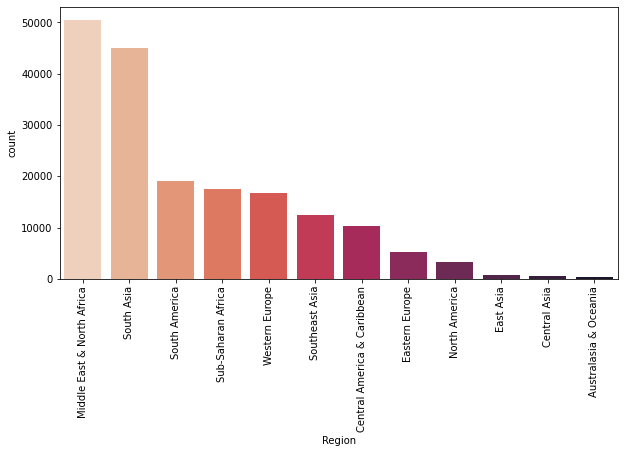

In [143]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'Region', data = Data, palette = 'rocket_r', order = Data['Region'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

**From the above bar chart we can conclude the following:**

**Middle East & North Africa, South Asia** 
**region has highest terror attack.**

**Astralasia & oceania has least terror attack**

In [144]:
Attacktype_count=Data['Attack_type'].value_counts()
Attacktype_count

Bombing/Explosion                 88140
Armed Assault                     42637
Assassination                     19308
Kidnapping                        11158
Facility/Infrastructure Attack    10330
Unknown                            7276
Unarmed Assault                    1014
Barricade Incident                  991
Hijacking                           659
Name: Attack_type, dtype: int64

In [30]:
Attacktype_count['Bombing/Explosion']/Attacktype_count.sum() * 100

48.57422767225674

In [31]:
Attacktype_count['Armed Assault']/Attacktype_count.sum() * 100

23.484377321936694

In [32]:
Attacktype_count['Assassination']/Attacktype_count.sum() * 100

10.629035009989488

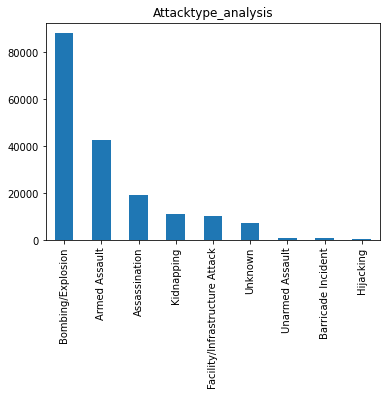

In [145]:
Attacktype_count.plot(x='Attack_Type',y='Count',title='Attacktype_analysis',kind='bar')


**Insights based on Attack**
---
*According to the data **48%** of the Modus Operandi of global attack by terrorists is Bombing and Explosion from this we can take action to stop attack by tracking bulk purchase orders of chemical explosives and transit globally OR by Regulating the Bulk purchase orders of the explosives* 

*After Bombing/Explosion Armed Assault is on the second rank of the list of attack type with **23%** by this data we can draw insights that all the countries globally should work in tandem to bring stringent laws with respect to arms and ammuninations*

*The Third rank on the list of attack type is Assassination with the overall **10%** globally*   


**Check the trend of the Terrorism by years with the help of Count plot**

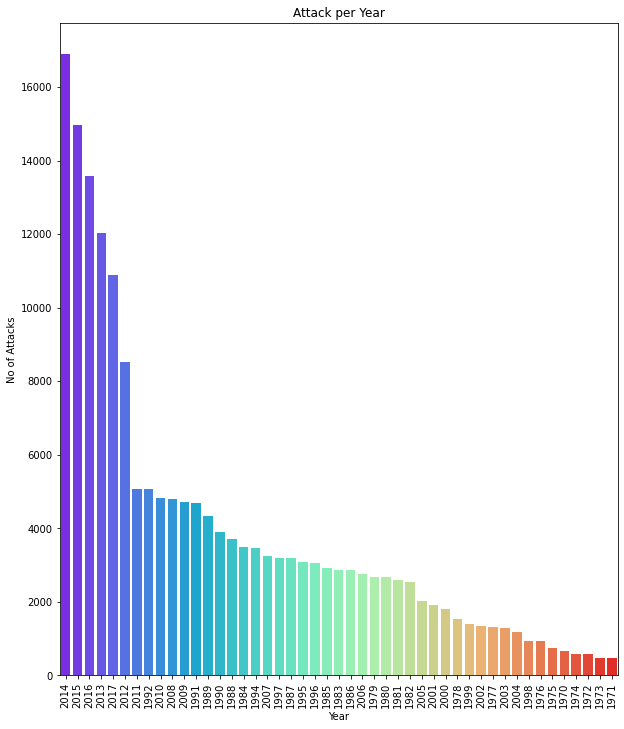

In [146]:
plt.figure(figsize = (10,12))
sns.countplot(x = 'Year', data = df, palette = 'rainbow', order = df['Year'].value_counts().index)
plt.title('Attack per Year')
plt.ylabel('No of Attacks')
plt.xticks(rotation = 90)
plt.show()

*From the above we can Clearly point out that 2014 was the year where most number of Terrorist activities have had happened and the terrorist activities have been inconsistent with year and being varied accordingly with Y-O-Y*

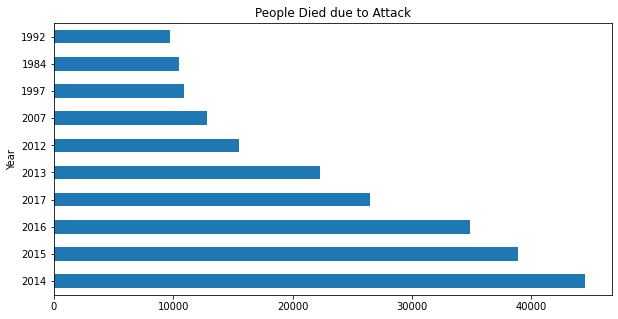

In [147]:
plt.figure(figsize = (10,5))
country_kill =Data.groupby('Year')['Total_Killed'].sum()
top_10_country = country_kill.sort_values(ascending = False).iloc[0:10]
top_10_country.plot(kind= 'barh')
plt.title('People Died due to Attack')
plt.show()

**From above graph we can Conclude that the Killings have been Highest in the year 2014 and comparatively least in the year 1992**

In [149]:
rush = df.groupby(["latitude", "longitude"])["Country"].count().reset_index()
rush.columns=["Lat", "Lon", "No of Attacks"]
rushsort = rush.sort_values(by="No of Attacks", ascending=False)
rushsort

,Lat,Lon,No of Attacks
32480,33.303566,44.371773,7521
23344,24.891115,67.143311,2686
1800,-11.967368,-76.978462,2401
41009,36.354145,43.143570,2247
48618,54.607712,-5.956210,2189
...,...,...,...
18951,16.707486,-93.012251,1
18952,16.710031,120.347567,1
18953,16.712405,98.574665,1
18955,16.713142,98.574587,1


In [150]:
from folium.plugins import HeatMap
import folium
basemap=folium.Map()
HeatMap(rushsort[:100]).add_to(basemap)
basemap

**CONCLUSION BASED ON HEATMAP**

* A heatmap is a graphical representation of data where individual values are represented as colors. 
* In the context of a global terrorism dataset, a heatmap could be used to visualize the distribution of terrorist attacks across different countries or regions. 
* The heatmap could display the number of terrorist incidents in each country or region by using different shades of color, with darker shades indicating higher numbers of incidents
* Additionally, the heatmap could also be used to display other information such as the types of terrorist attacks, the organizations responsible for the attacks, or the time period during which the attacks occurred. 
* By using a heatmap, it is easy to identify patterns and trends in the data, such as which countries or regions are most affected by terrorism, which types of attacks are most common, and which organizations are responsible for the majority of attacks. 
*This can help analysts and policymakers to understand the global terrorism landscape, and make informed decisions to combat it.*

**To find the cities which are most affected by the terrorist attacks**

In [151]:
filtered = Data[Data['City'] != 'Unknown']

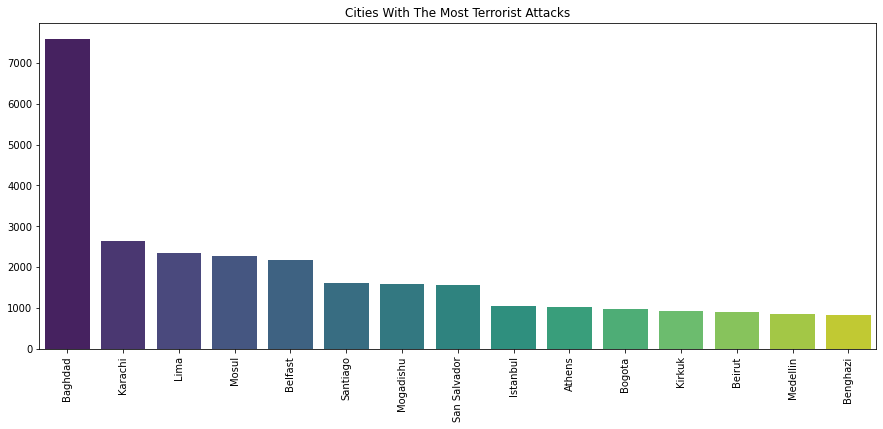

In [152]:
plt.subplots(figsize=(15,6))
sns.barplot(filtered['City'].value_counts().head(15).index, filtered['City'].value_counts().head(15).values, 
            palette = "viridis")
plt.xticks(rotation=90)
plt.title('Cities With The Most Terrorist Attacks')
plt.show()

**CONCLUSION**
*  *Based on the above graph its evident that **Baghdad**, **Karachi**, **Lima** are top three cities which are mostly affected by the attacks*
* *Which implies that more efforts for peacekeeping forces of UN and military aides to be deployed in these cities for its effective controlling of the terrorist activities*

In [153]:
#Making a new column called WeaponCount which is the sum of each type of weapon and adding it to dataframe
Data['WeaponCount'] = Data.Weapon_Type.groupby(Data.Weapon_Type).transform('count')

#Creating new Dataframe to get only Weapon Type and WeaponCount and dropping duplicates from Weapon Type
data1 = Data.copy()
data2 = data1[['Weapon_Type','WeaponCount']]
data3 = data2.drop_duplicates(keep='first')

#Creating Donut Chart
labels = data3['Weapon_Type'].unique()
values = data3['WeaponCount']
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(
    title_text="Terrorist Weapon Types")
fig.show()

**Conclusion  Based on Donut chart**
* *The donut chart produced by this code snippet gives a visual representation of the different types of weapons used in terrorist attacks and the number of times they were used. It allows the user to easily compare the different weapon types and their usage frequency. The hole in the center of the chart makes it easy to compare the relative sizes of the different sections of the chart. This chart is a useful tool for understanding the weapon types that are commonly used in terrorist attacks and can help in the development of counter-terrorism strategies.*

**Lets check Largest Terrorist group**

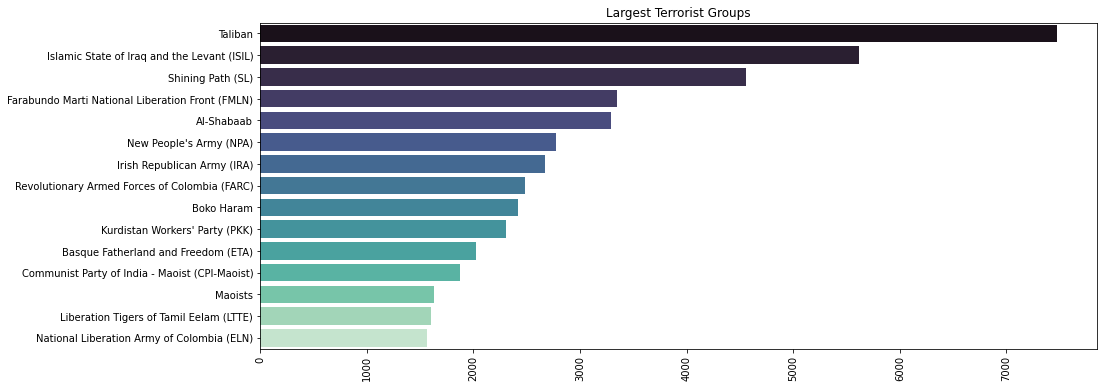

In [154]:
#Creating new dataframe without Unknown Category
filtered = Data[Data['Terror_Group'] != 'Unknown']

#Horizontal Barplot
plt.subplots(figsize=(15,6))
sns.barplot(filtered['Terror_Group'].value_counts().head(15).values, filtered['Terror_Group'].value_counts().head(15).index, 
            palette = "mako")
plt.xticks(rotation=90)
plt.title('Largest Terrorist Groups')
plt.show()

**Conclusion according to the Horizontal Bargraph :**

 *According to Horital bar graph we can arrive at an inference that **Taliban** is the largest  among the terrorist group hence security agencies need to analyze the activities of the group frequently*
 *Second largest terrorist group being* **Islamic State of Iraq and the Levant(ISIL)** and the Third being **Shining Path(SL)**

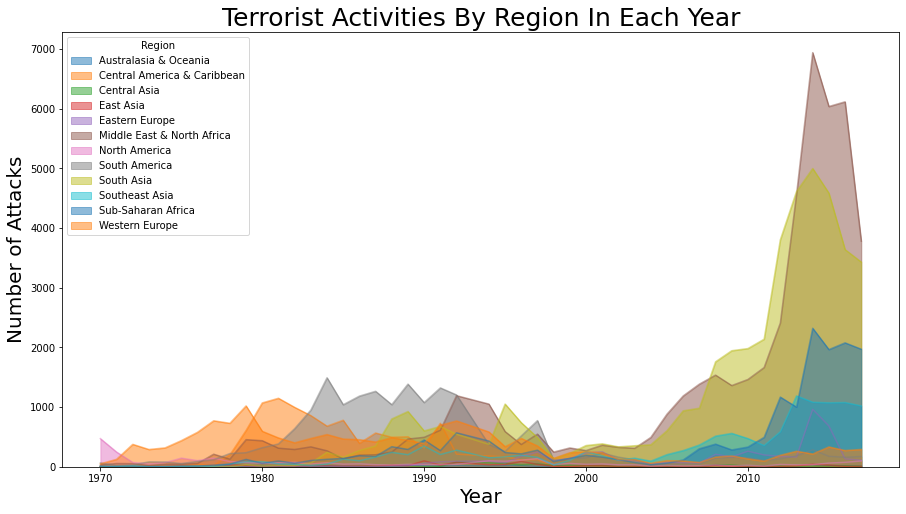

In [135]:
# Using matplotlib to plot a line chart to vitualize the data above

pd.crosstab(Data.Year, Data.Region).plot(kind='area',stacked=False,figsize=(15,8))
plt.title('Terrorist Activities By Region In Each Year',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

In [137]:
country_count=df['Country'].value_counts()


In [138]:
geog=pd.DataFrame({'country':country_count.index, 'number_of_attacks':country_count.values})

In [139]:
geog.head()

,country,number_of_attacks
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306


In [140]:
fig = px.choropleth(geog, locations="country", 
                    locationmode='country names', color="number_of_attacks", 
                    hover_name="country", range_color=[1, 1000], 
                    color_continuous_scale="blues", 
                    title='Number of terrorist attacks by country')
fig.update(layout_coloraxis_showscale=True)
fig.show()

**Conclusion based on geographic map**
* *The regions which are darkshows the intensity of number of attacks the darker the region higher the number of attacks varying from 200 to >1000 where 200 being represented by lighter color and 1000 and above are represented by darker region*

**TO ANALYZE INDIA'S VULNERABILITY TO TERRORIST ATTACK**

In [159]:
IND = Data[Data['Country'] =='India']
IND

,Year,Incident_Duration,City,Country,Region,Summary,Success,Attack_Tactic,Attack_type,Suicide,...,Total_Wounded,Terrorists_Killed,Prorperty_Damage,Hostage_con,Ransom,Ransom_amt,Ransom_amt_paid,Hostage_outcome,Total_Casualities,WeaponCount
1186,1972,More than 24 hours,New Delhi,India,South Asia,Unknown,1,Unknown,Hijacking,0,...,0,0,Unknown,Yes,Yes,5000000,0,Hostage(s) released by perpetrators,0,92313
2764,1975,More than 24 hours,Samastipur,India,South Asia,"1/2/1975: The Indian Railway Minister, Lalit N...",1,Unknown,Bombing/Explosion,0,...,0,0,Unknown,NO,Unknown,0,0,Unknown,4,92313
3857,1976,More than 24 hours,New Delhi,India,South Asia,Unknown,1,Unknown,Bombing/Explosion,0,...,0,0,Unknown,NO,NO,0,0,Unknown,0,92313
5327,1977,More than 24 hours,Bombay,India,South Asia,Unknown,1,Unknown,Hijacking,0,...,0,0,Unknown,Yes,Yes,6000000,0,Hostage(s) released by perpetrators,0,58488
7337,1979,More than 24 hours,Unknown,India,South Asia,Unknown,1,Unknown,Armed Assault,0,...,0,0,Unknown,NO,NO,0,0,Unknown,0,58488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181663,2017,More than 24 hours,Koothuparamba,India,South Asia,12/30/2017: Assailants threw an explosive devi...,1,Unknown,Bombing/Explosion,0,...,0,0,Unknown,NO,Unknown,0,0,Unknown,0,92313
181665,2017,More than 24 hours,Toylanka,India,South Asia,12/30/2017: Assailants set fire to seven vehic...,1,Unknown,Facility/Infrastructure Attack,0,...,0,0,Minor: Likely Less than $1 Million,NO,Unknown,0,0,Unknown,0,58488
181672,2017,More than 24 hours,Lethapora,India,South Asia,12/31/2017: Assailants armed with grenades and...,1,Unknown,Armed Assault,1,...,0,3,Unknown,NO,Unknown,0,0,Unknown,8,92313
181684,2017,More than 24 hours,Hungrum,India,South Asia,12/31/2017: Assailants abducted Prafulla Phuka...,1,Unknown,Kidnapping,0,...,0,0,Unknown,Yes,NO,0,0,Successful Rescue,0,58488


***Attack type based on Region***


In [163]:
attack_per_region = Data.groupby(['Region'])['Attack_type'].count().sort_values(ascending=False)
attack_per_region

Region
Middle East & North Africa     50474
South Asia                     44973
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12484
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3280
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Attack_type, dtype: int64

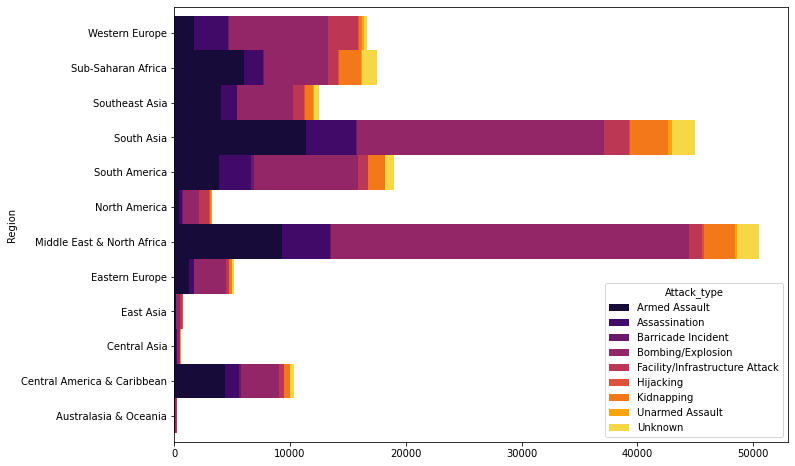

In [166]:
# Creating a table for above objective
pd.crosstab(Data.Region, Data.Attack_type).plot.barh(stacked=True,width=1,color=sns.color_palette('inferno',9))
fig=plt.gcf()
fig.set_size_inches(11,8)
plt.show() 

***Insights based on Bar Graph***
* *The **Middle East** and **North Africa** regions are the most affected by terrorist activities by 49576 attacks with highest form being Bombing/explosion*

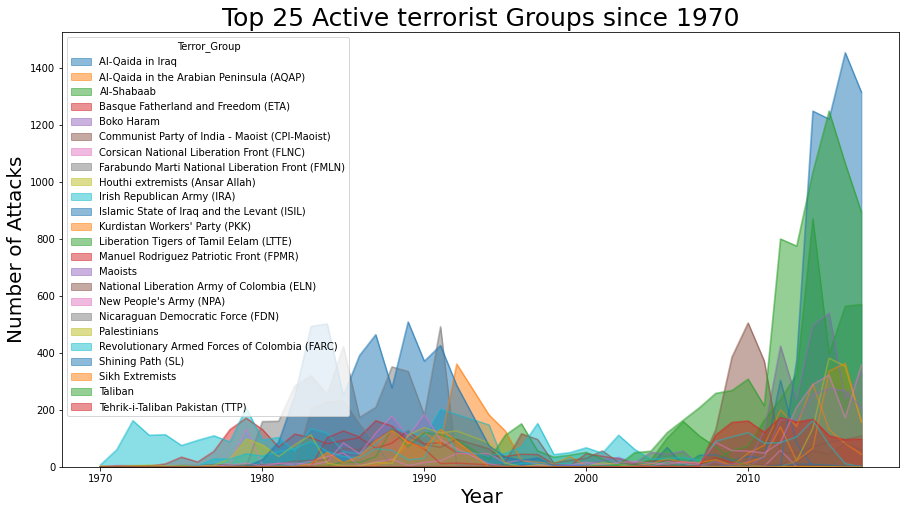

In [167]:
# Filtering data with top 25 most active groups in the database
top_25_groups = Data[Data['Terror_Group'].isin(Data['Terror_Group'].value_counts()[1:25].index)]

# Using matplotlib to plot a line chart to vitualize the data above

pd.crosstab(top_25_groups.Year, top_25_groups.Terror_Group).plot(kind='area',stacked=False,figsize=(15,8))
plt.title('Top 25 Active terrorist Groups since 1970',fontsize=25)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

**Deaths Caused by top 10 terrorist groups**

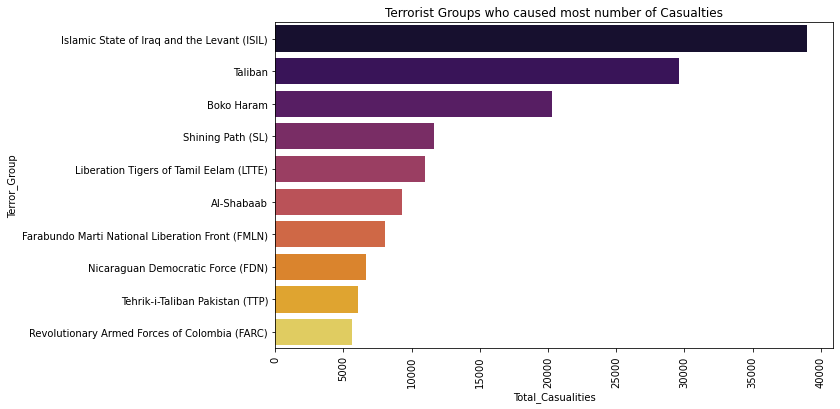

In [169]:
# Creating a table for above Objective
total_kills = Data.groupby(['Terror_Group'])[['Total_Casualities']].agg('sum').sort_values(by='Total_Casualities', ascending=False)
total_kills.reset_index(inplace=True)

# Ploting a bar chart with seaborn
sns.barplot(y = total_kills['Terror_Group'][1:11], x= total_kills['Total_Casualities'][1:11], palette=('inferno'))
plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.title('Terrorist Groups who caused most number of Casualties')
plt.show()

**Insights based on Horizontal Bar graph on number of deaths caused by top 10 terror groups**
* **ISIL** *being on top of the list with more than 36000 casualities caused.*


## **Attack tactic**

In [173]:
# Creating top attack tactic by Terror_Groups
top_attack_tac = Data['Attack_Tactic'].value_counts().reset_index().rename(columns={'index':'Attack_Tactic','Attack_Tactic':'Count'})

# Create a pie plot for better Visualization
fig = px.pie(top_attack_tac, values='Count', names='Attack_Tactic', hole=.5, height = 500, width = 800)

fig.update_layout(legend=dict(
        font=dict(
            size=12,
            color="black"
        ),
        bgcolor="Gray",
        bordercolor="White",
        borderwidth=2
    ))
fig.show()

# Targets of Terror Groups

In [176]:
from wordcloud import WordCloud 


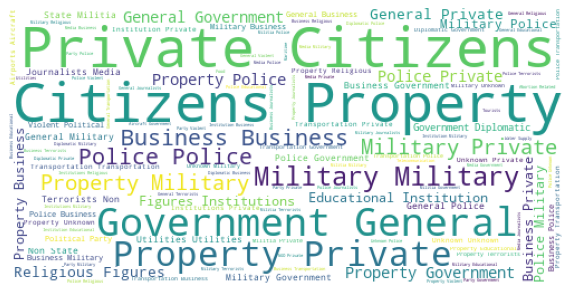

In [177]:
#Word Cloud
Targets=Data.Target_type.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud= WordCloud(background_color='white', width=500, height = 250).generate(' '.join(Targets))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [178]:
prop_damage = Data['Prorperty_Damage'].value_counts().reset_index().rename(columns={'index':'Prorperty_Damage','Prorperty_Damage':'Count'})
prop_damage

,Prorperty_Damage,Count
0,Unknown,137391
1,Minor: Likely Less than $1 Million,43207
2,Major: Between $1 Million - $1 Billion,909
3,Catastrophic: Likely more than $1 Billion,6


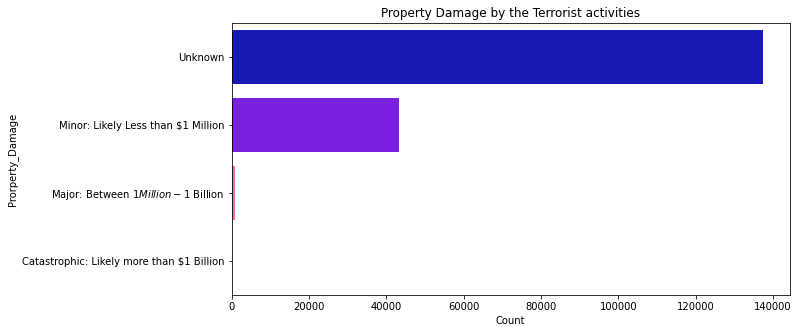

In [188]:
sns.barplot(y=prop_damage['Prorperty_Damage'],x=prop_damage['Count'],palette=('gnuplot2'))
fig=plt.gcf()
fig.set_size_inches(10,5)
plt.title('Property Damage by the Terrorist activities')
plt.show()

# Insights into Terrorsit activities in India

In [189]:
#Subsetting data to only include entries for INDIA 
IND = Data[Data['Country'] =='India']

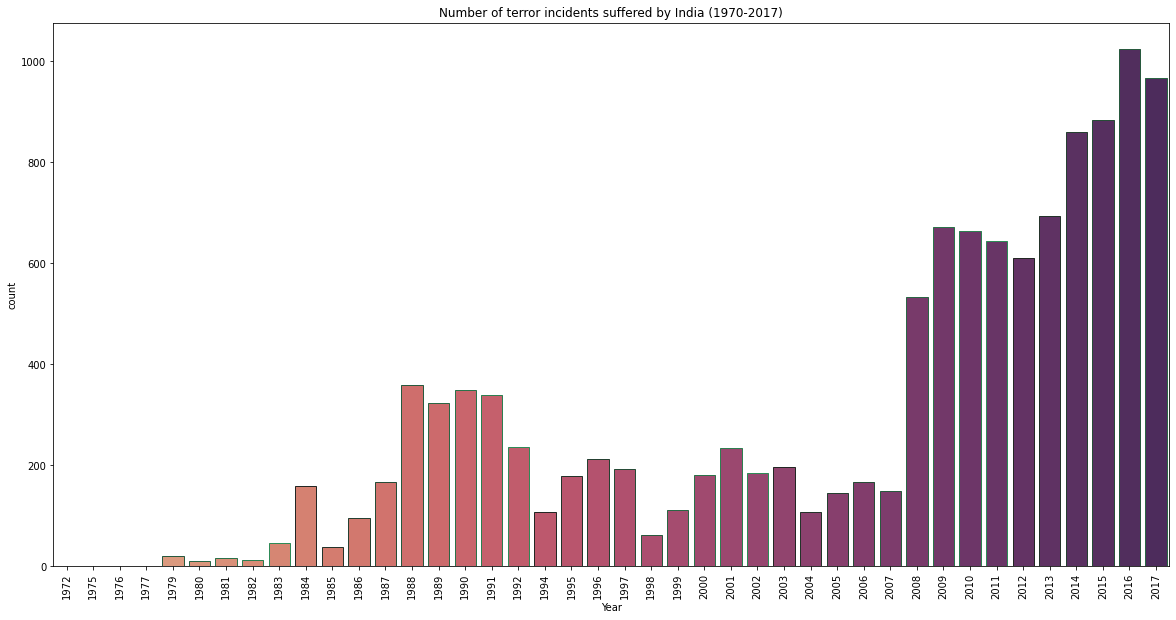

In [197]:
plt.subplots(figsize=(20,10))
sns.countplot('Year',data=IND,palette='flare',edgecolor=sns.dark_palette('seagreen',9))
plt.xticks(rotation=90)
plt.title('Number of terror incidents suffered by India (1970-2017)')
plt.show()

In [162]:
#Subsetting data to only include entries for INDIA 
IND = Data[Data['Country'] =='India']

#Removing Unknown in Terror_Group
filtered = IND[IND['Terror_Group'] != 'Unknown']

#Profile
print("Year With The Most Attacks:",IND['Year'].value_counts().idxmax())

print("Most Common Attack Type:",IND['Attack_type'].value_counts().idxmax())

print("Most Common Weapon Type:",IND['Weapon_Type'].value_counts().idxmax())

print("Most Common Target Type:",IND['Target_type'].value_counts().idxmax())

print('Terrorist Group with Highest Number Of Terror Attacks:', filtered['Terror_Group'].value_counts().idxmax())

Year With The Most Attacks: 2016
Most Common Attack Type: Bombing/Explosion
Most Common Weapon Type: Explosives
Most Common Target Type: Private Citizens & Property
Terrorist Group with Highest Number Of Terror Attacks: Communist Party of India - Maoist (CPI-Maoist)


***From the above code analysis we can derive the following insights for INDIA from the dataset as follows:***

* *Year With The Most Attacks: 2016*
* *Most Common Attack Type: Bombing/Explosion*
* *Most Common Weapon Type: Explosives*
* *Most Common Target Type: Private Citizens & Property*
* *Terrorist Group with Highest Number Of Terror Attacks: Communist Party of India - Maoist (CPI-Maoist)*



In [213]:
Attack_city = IND['City'].value_counts().reset_index().rename(columns={'index':'City','City':'No_of_Attacks'})
Casuality_count = IND.groupby(['City'])['Total_Casualities'].sum().reset_index()
Casuality_count_per_City = Attack_city.merge(Casuality_count,how = 'inner',on='City')
Casuality_count_per_City.max()
Casuality_count_per_City

,City,No_of_Attacks,Total_Casualities
0,Srinagar,658,769
1,Unknown,624,1458
2,Imphal,426,140
3,New Delhi,157,378
4,Amritsar,138,376
...,...,...,...
4793,Bhagirath Para,1,0
4794,Leimakhong,1,0
4795,Halwara,1,0
4796,Banka,1,0


In [214]:
Casuality_count_per_City.max()

City                  uri
No_of_Attacks         658
Total_Casualities    1458
dtype: object

In [212]:
uri_data = IND.loc[IND.City == 'uri']
uri_terror_data = uri_data['Terror_Group'].value_counts()
uri_terror_data.head()

Muslim Militants    1
Name: Terror_Group, dtype: int64

In [226]:
srinagar_data = IND.loc[IND.City == 'Srinagar']
srinagar_terror_data = srinagar_data['Terror_Group'].value_counts()
srinagar_terror_data.head()

Unknown                               306
Muslim Separatists                     55
Jammu and Kashmir Liberation Front     45
Kashmiri extremists                    37
Muslim Militants                       35
Name: Terror_Group, dtype: int64

In [225]:
Terror_Groups_India=IND['Terror_Group'].value_counts()
Terror_Groups_India

Unknown                                           4263
Communist Party of India - Maoist (CPI-Maoist)    1877
Maoists                                           1396
Sikh Extremists                                    710
United Liberation Front of Assam (ULFA)            357
                                                  ... 
Akhilesh Singh Gang                                  1
Ananda Marga                                         1
Al-Hamas Mujahideen                                  1
Achik National Volunteer Council (ANVC)              1
Ansar Ghazwat-ul-Hind                                1
Name: Terror_Group, Length: 301, dtype: int64

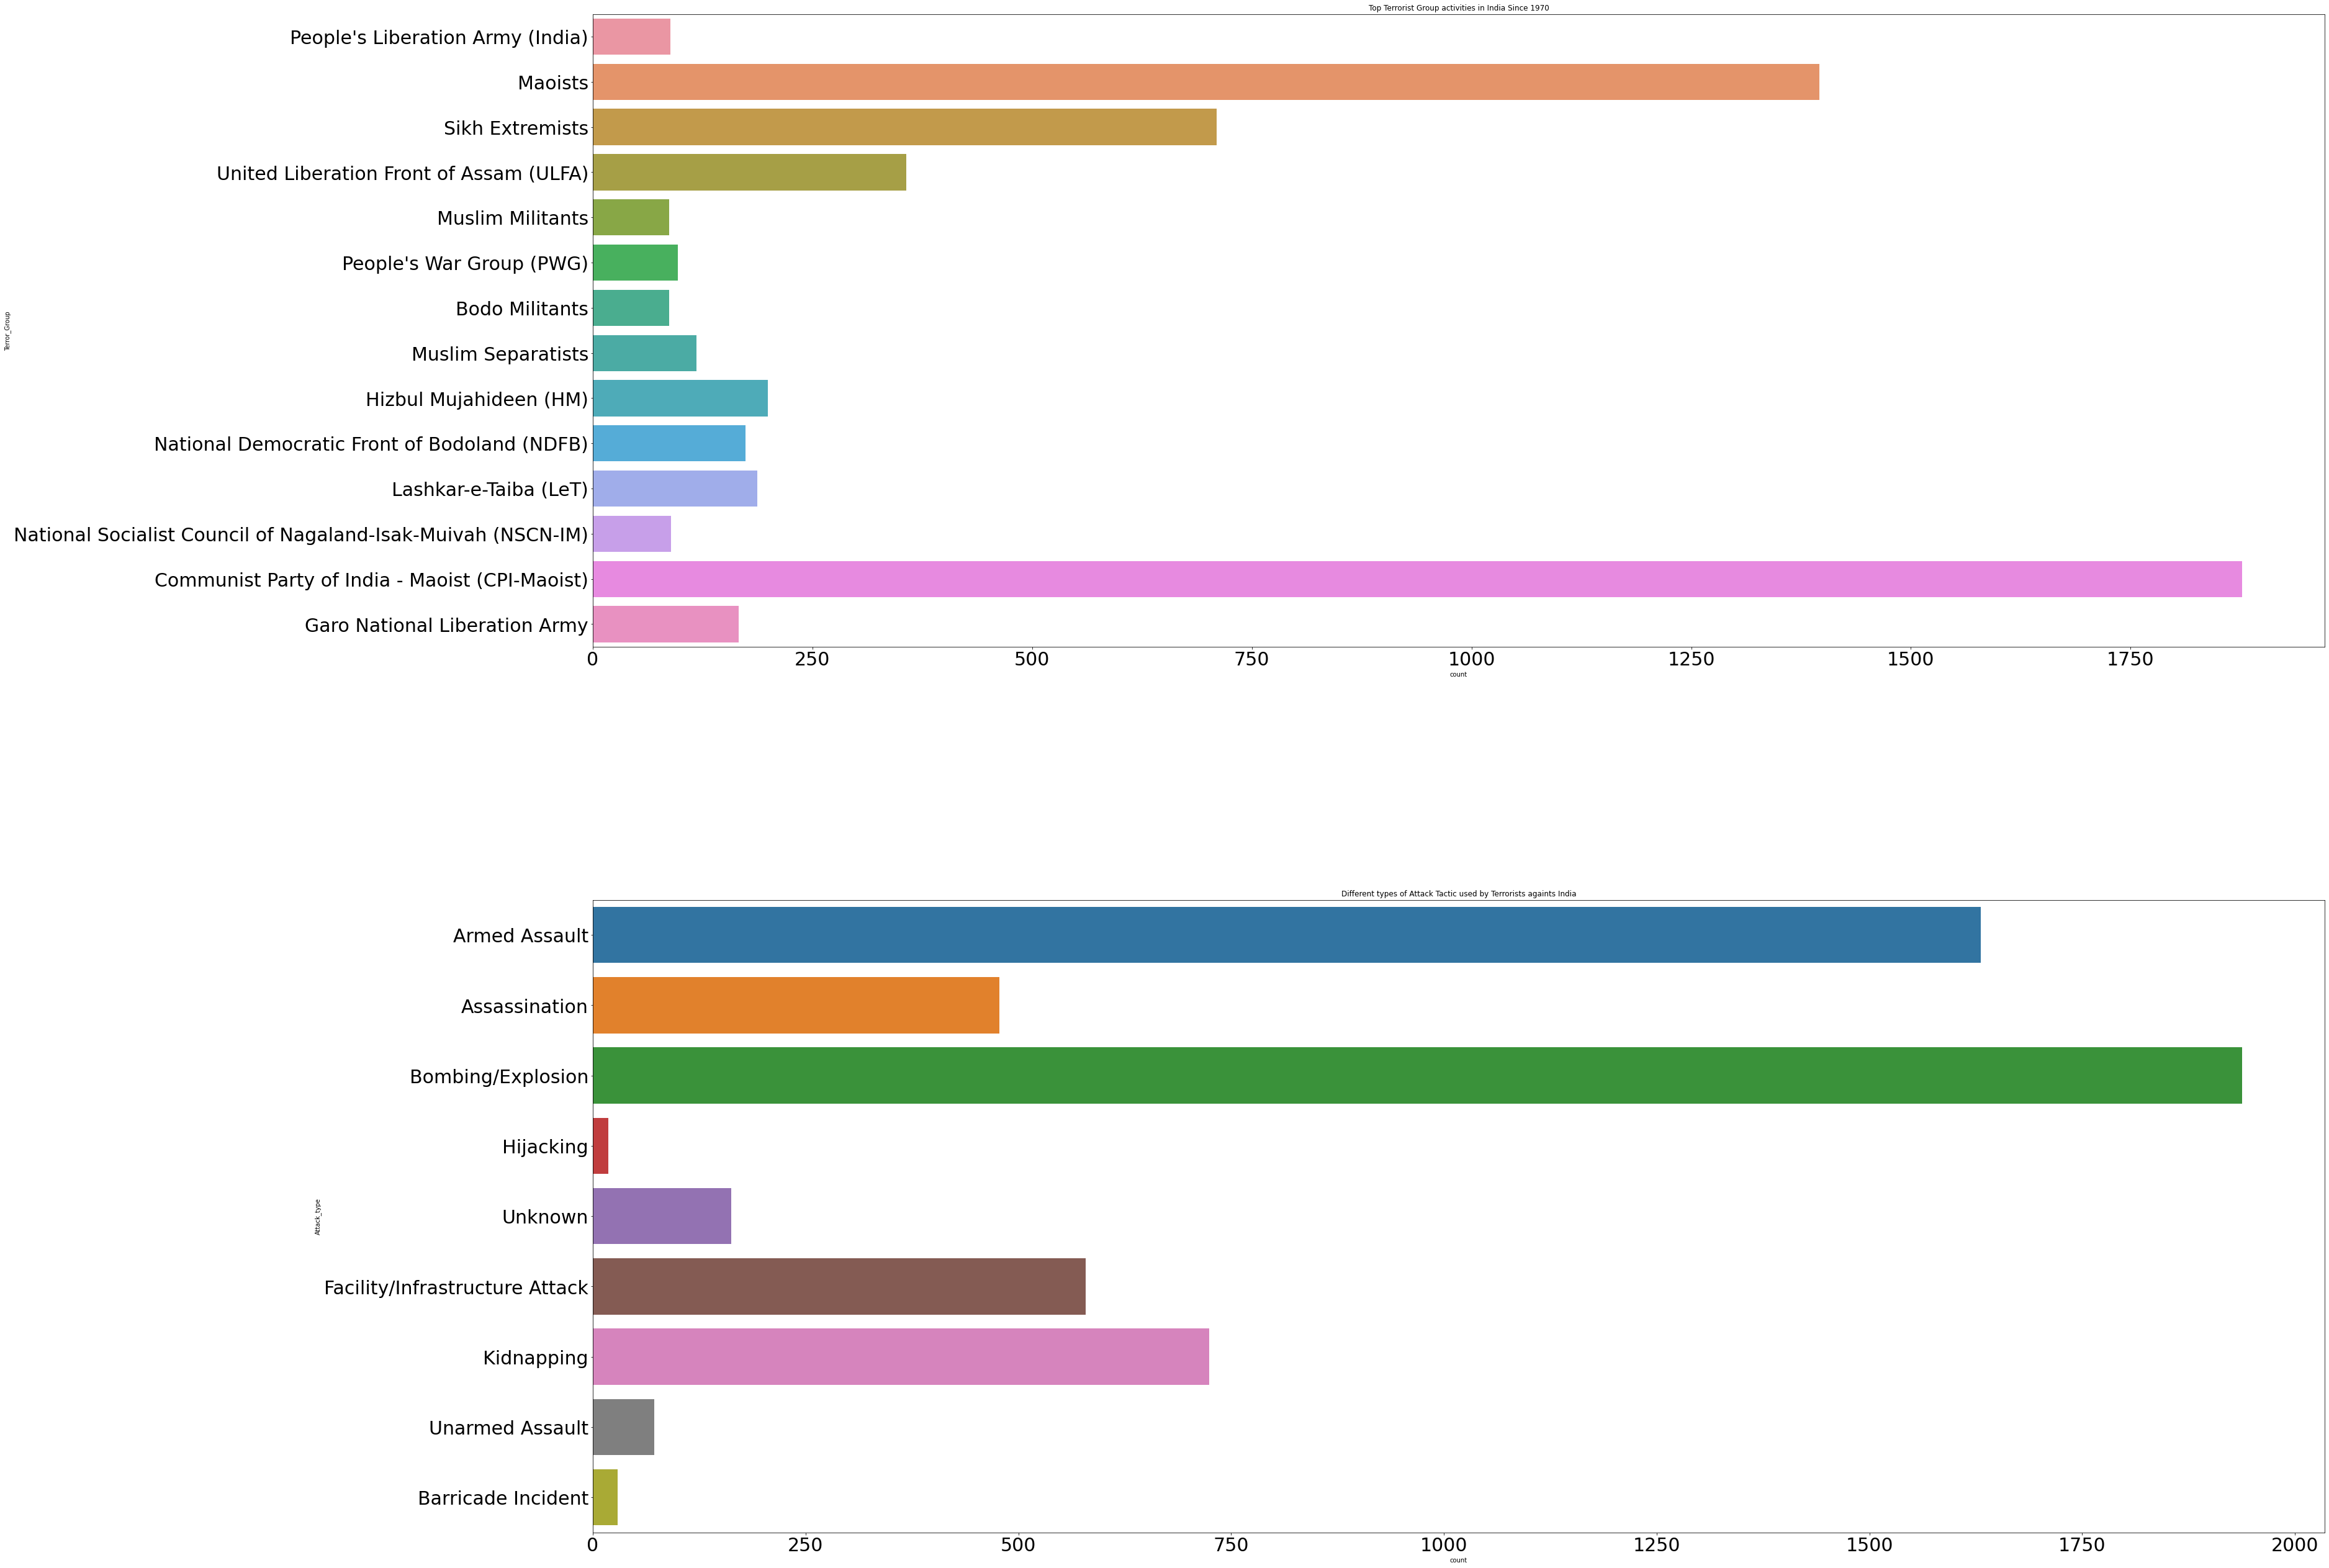

In [232]:
#Creating subplot
fig,ax = plt.subplots(2,1,figsize=(50,45))
#Creating filtered top terror groups of India
top_terror_grps = IND[IND['Terror_Group'].isin(IND['Terror_Group'].value_counts()[1:15].index)]

sns.countplot(y='Terror_Group',data=top_terror_grps, ax = ax[0])
ax[0].set_title('Top Terrorist Group activities in India Since 1970')


# Most used attack tactic by the Terror_Groups
sns.countplot(y='Attack_type', data = top_terror_grps, ax=ax[1])
ax[1].set_title('Different types of Attack Tactic used by Terrorists againts India')

plt.subplots_adjust(hspace=0.4, wspace=0.6)
ax[0].tick_params(labelsize=30)
ax[1].tick_params(labelsize=30)
plt.show()


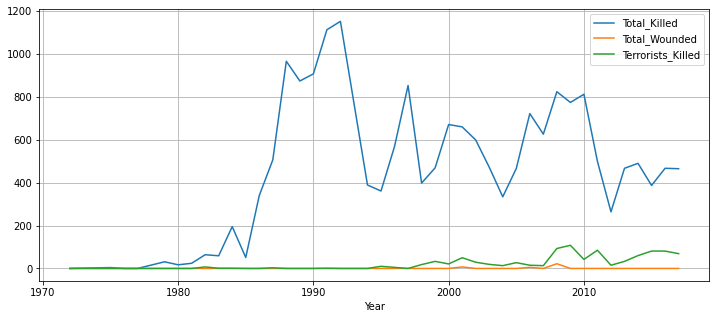

In [233]:
india_casulities_data = IND.groupby(['Year'])[['Total_Killed','Total_Wounded','Terrorists_Killed']].sum()
india_casulities_data.reset_index(inplace=True)
# Plotting simple line graph w.r.t Years
india_casulities_data.set_index('Year').plot(figsize=(12,5), grid=True)
plt.show()

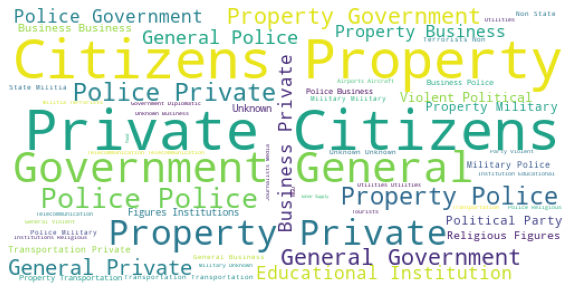

In [234]:
#Word Cloud
Targets=IND.Target_type.dropna(False)
plt.subplots(figsize=(10,10))
wordcloud= WordCloud(background_color='white', width=500, height = 250).generate(' '.join(Targets))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [238]:
india_targets = Data.loc[(Data.Country == 'India') & (Data['Target_type']=='Private Citizens & Property')]

In [240]:
targets_ = IND.loc[IND["Target_type"]== 'Private Citizens & Property']
df_targets = targets_['Target_SubCat'].value_counts().reset_index().rename(columns={'index':"Target Sub-Category type",'Target_SubCat':'No.of Incidents'})

In [244]:
fig = px.pie(df_targets, values='No.of Incidents', names='Target Sub-Category type', hole=.5, height = 600, width = 1200)

fig.update_layout({'plot_bgcolor': 'rgba(0,0,0,0)','paper_bgcolor': 'rgba(0,0,0,0)'}, legend=dict(
        font=dict(
            size=12,
            color="black"
        ),
        bgcolor="LightSteelBlue",
        bordercolor="Black",
        borderwidth=2
    ))

fig.show()
print(f'\n\nNumber of Private Citizens & Property related incidents since 1970: {targets_.shape[0]}')



Number of Private Citizens & Property related incidents since 1970: 3144


# Primitive/Old techniques used by terrorists

Creating Sub plots

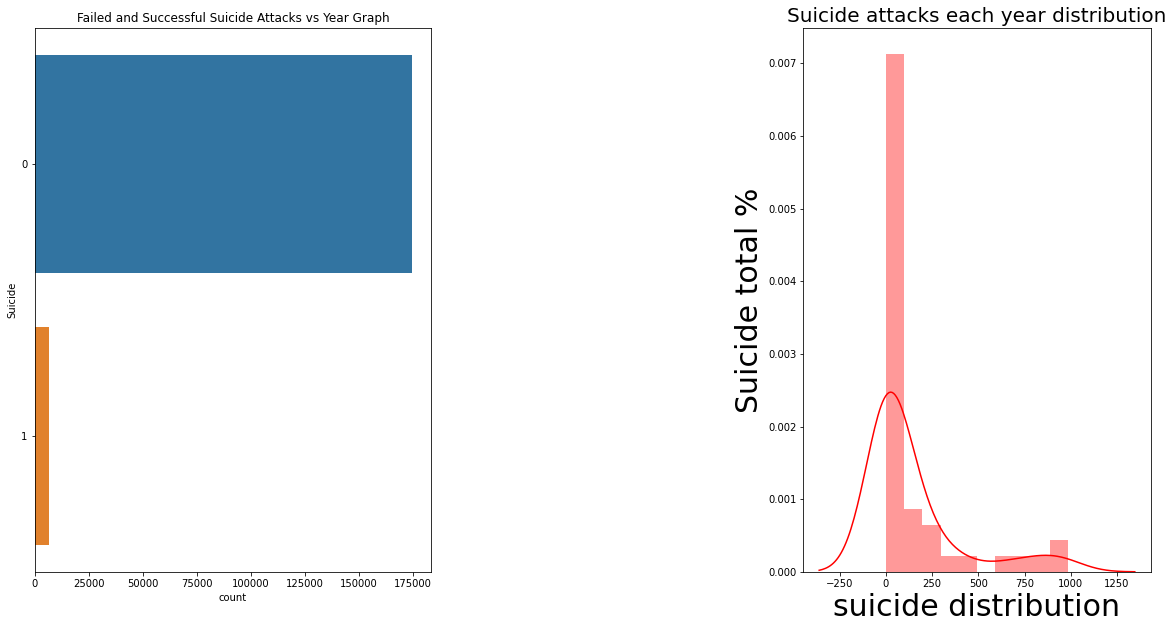

In [253]:
# Setting up the subplot
fig,ax = plt.subplots(1, 2, figsize = (20,10),  gridspec_kw={'width_ratios': [.8, .7]})
# Graph for Sucide attempts made
sns.countplot(y = 'Suicide', data = Data, ax = ax[0])
ax[0].set_title('Failed and Successful Suicide Attacks vs Year Graph')
# grapha for Sucide Distribution
fig = sns.distplot(Data[["Year","Suicide"]].groupby("Year").aggregate(np.sum), color = 'r')
fig.set_xlabel("suicide distribution",size=30)
fig.set_ylabel("Suicide total %",size=30)
plt.title('Suicide attacks each year distribution', size = 20)

plt.subplots_adjust(hspace=1, wspace=1)
plt.show()

In [254]:
Host_data = Data[Data.Hostage_con == 'Yes']

In [255]:
Host_data

,Year,Incident_Duration,City,Country,Region,Summary,Success,Attack_Tactic,Attack_type,Suicide,...,Total_Wounded,Terrorists_Killed,Prorperty_Damage,Hostage_con,Ransom,Ransom_amt,Ransom_amt_paid,Hostage_outcome,Total_Casualities,WeaponCount
1,1970,More than 24 hours,Mexico city,Mexico,North America,Unknown,1,Unknown,Kidnapping,0,...,0,0,Unknown,Yes,Yes,800000,0,Unknown,0,15157
27,1970,More than 24 hours,Caracas,Venezuela,South America,Unknown,1,Unknown,Kidnapping,0,...,0,0,Unknown,Yes,Yes,110000,110000,Hostage(s) released by perpetrators,0,15157
103,1970,More than 24 hours,Unknown,Spain,Western Europe,Unknown,0,Unknown,Kidnapping,0,...,0,0,Unknown,Yes,Yes,0,0,Unknown,0,15157
112,1970,Less than 24 hours,Guatemala City,Guatemala,Central America & Caribbean,Unknown,1,Unknown,Kidnapping,0,...,0,0,Unknown,Yes,Yes,0,0,Hostage(s) released by perpetrators,0,58488
123,1970,Less than 24 hours,Sao Paulo,Brazil,South America,Unknown,1,Unknown,Kidnapping,0,...,0,0,Unknown,Yes,Yes,0,0,Hostage(s) released by perpetrators,0,15157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181620,2017,Less than 24 hours,Pul-e-Sukh,Afghanistan,South Asia,12/28/2017: Assailants abducted two students a...,1,Unknown,Kidnapping,0,...,0,0,Unknown,Yes,NO,0,0,Successful Rescue,0,58488
181630,2017,Less than 24 hours,Tuael,Philippines,Southeast Asia,12/28/2017: Assailants abducted Deputy Police ...,1,Unknown,Kidnapping,0,...,0,0,Unknown,Yes,NO,0,0,Unknown,0,58488
181636,2017,Less than 24 hours,Darzab district,Afghanistan,South Asia,12/29/2017: Assailants abducted 12 religious s...,1,Unknown,Kidnapping,0,...,0,0,Unknown,Yes,NO,0,0,Unknown,0,15157
181660,2017,More than 24 hours,Kharkiv,Ukraine,Eastern Europe,"12/30/2017: An assailant, equipped with two ex...",1,Other Crime Type,Barricade Incident,1,...,0,0,Unknown,Yes,NO,0,0,Successful Rescue,0,92313


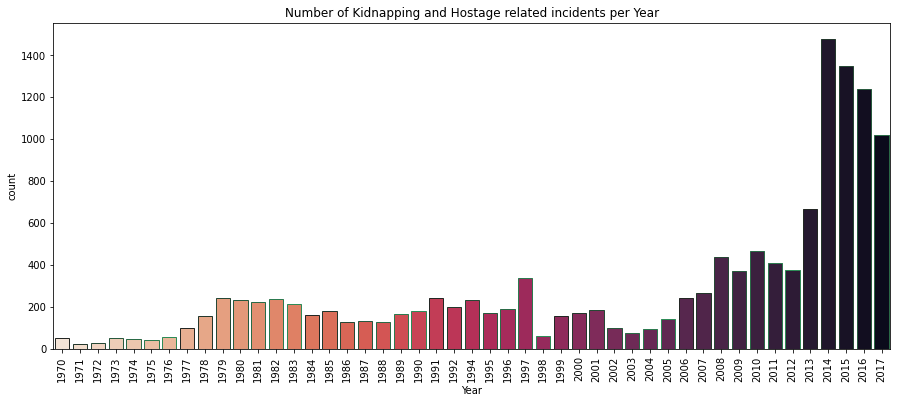



Since 2004, There is sudden increase in Kidnapping/Hostage related incidents accross the world. 
The situation seems controlled till year 2012, but again it can been seen that the number of incidents increasing exponentially.


In [256]:
# Using matplotlib to plot a line chart to visualize the data above

plt.subplots(figsize=(15,6))
sns.countplot('Year', data= Host_data, palette='rocket_r', edgecolor = sns.dark_palette("seagreen",7))
plt.xticks(rotation = 90)
plt.title('Number of Kidnapping and Hostage related incidents per Year')
plt.show()
print("""\n\nSince 2004, There is sudden increase in Kidnapping/Hostage related incidents accross the world. 
The situation seems controlled till year 2012, but again it can been seen that the number of incidents increasing exponentially.""")

In [257]:
t_data = Host_data['Target_type'].value_counts().reset_index().rename(columns={'index':'Target Category type','Target_type':'No. of Incidents'})

fig = px.treemap(t_data, path=[px.Constant("Tree Map"), 'Target Category type' ], 
                 color_discrete_sequence=['#DB6574', '#03DAC5', '#0384da'],
                 values='No. of Incidents')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25), height = 600, width = 600,
                   plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
                        title_font=dict(size=25, color='#a5a7ab', family="Muli, sans-serif"),
                        font=dict(color='#8a8d93'), title= 'Victims of Kidnapping/Hostage Incidents')

In [258]:
t_data

,Target Category type,No. of Incidents
0,Private Citizens & Property,4967
1,Business,1837
2,Government (General),1794
3,Police,880
4,Military,826
5,Journalists & Media,659
6,Educational Institution,416
7,Government (Diplomatic),406
8,NGO,332
9,Religious Figures/Institutions,301


In [260]:
# filtering successful_hostage/kidnap incident from main data

successful_ransom_data = Host_data[(Host_data.Ransom_amt != 0) & (Host_data.Ransom_amt_paid != 0) & (Host_data.Ransom_amt != 'Unknown') & (Host_data.Ransom_amt_paid != 'Unknown')]

# filtering failed_hostage/kidnap incident from main data

failed_ransom_data = Host_data[(Host_data.Ransom_amt != 0) & (Host_data.Ransom_amt_paid == 0)]

# filtering hostage/kidnap incident where No Ransom was demanded

NO_ransom_data = Host_data[(Host_data.Ransom_amt == 0) & (Host_data.Ransom_amt_paid == 0)]

SyntaxError: ignored